### ===============================================
###  02_Preprocessing_EDA.ipynb
###  Team: The Outliers
###  Course: Advanced Apex Project - BITS Pilani
###  Phase: 2 (Preprocessing & Exploratory Data Analysis)
### ===============================================


#### Notebook Header + Imports

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set visualization style
sns.set(style="whitegrid")

In [3]:
# Load the dataset
df = pd.read_csv("../data/AmesHousing.csv")

In [4]:
# Display basic info
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:", len(df.columns))
df.head(3)

✅ Dataset loaded successfully!
Shape: (2930, 82)

Columns: 82


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


#### Data Types, Summary Statistics & Missing Value Overview

#### ===============================================
#### 🔍 Data Overview and Structure Analysis
#### ===============================================

In [5]:


# 1️⃣ Basic info about each column (data types, non-null counts)
print("🔹 Basic Dataset Info:\n")
df.info()

🔹 Basic Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   obje

In [6]:
# 2️⃣ Quick statistical summary of numeric columns
print("\n🔹 Summary Statistics (Numerical Features):\n")
display(df.describe().T)


🔹 Summary Statistics (Numerical Features):



,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [7]:
# 3️⃣ Summary of data types (to know how many are numeric vs categorical)
print("\n🔹 Data Type Counts:\n")
print(df.dtypes.value_counts())


🔹 Data Type Counts:

object     43
int64      28
float64    11
Name: count, dtype: int64


In [8]:
# 4️⃣ Check missing values in each column (sorted descending)
print("\n🔹 Missing Values Overview:\n")
missing_summary = df.isnull().sum().sort_values(ascending=False)
display(missing_summary.head(15))  # show top 15 columns with most missing values


🔹 Missing Values Overview:



Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
dtype: int64

- Columns like Pool QC, Alley, Misc Feature, Fence have >80% missing values — candidates for dropping.
- Others (Garage, Basement, Fireplace) will be imputed contextually.

We’ll now visualize the missing value pattern to confirm this visually — it helps us see whether missingness is random or structured.

#### Missing Value Visualization

#### ===============================================
#### 📊 Visualizing Missing Data Patterns
#### ===============================================

<Figure size 1200x600 with 0 Axes>

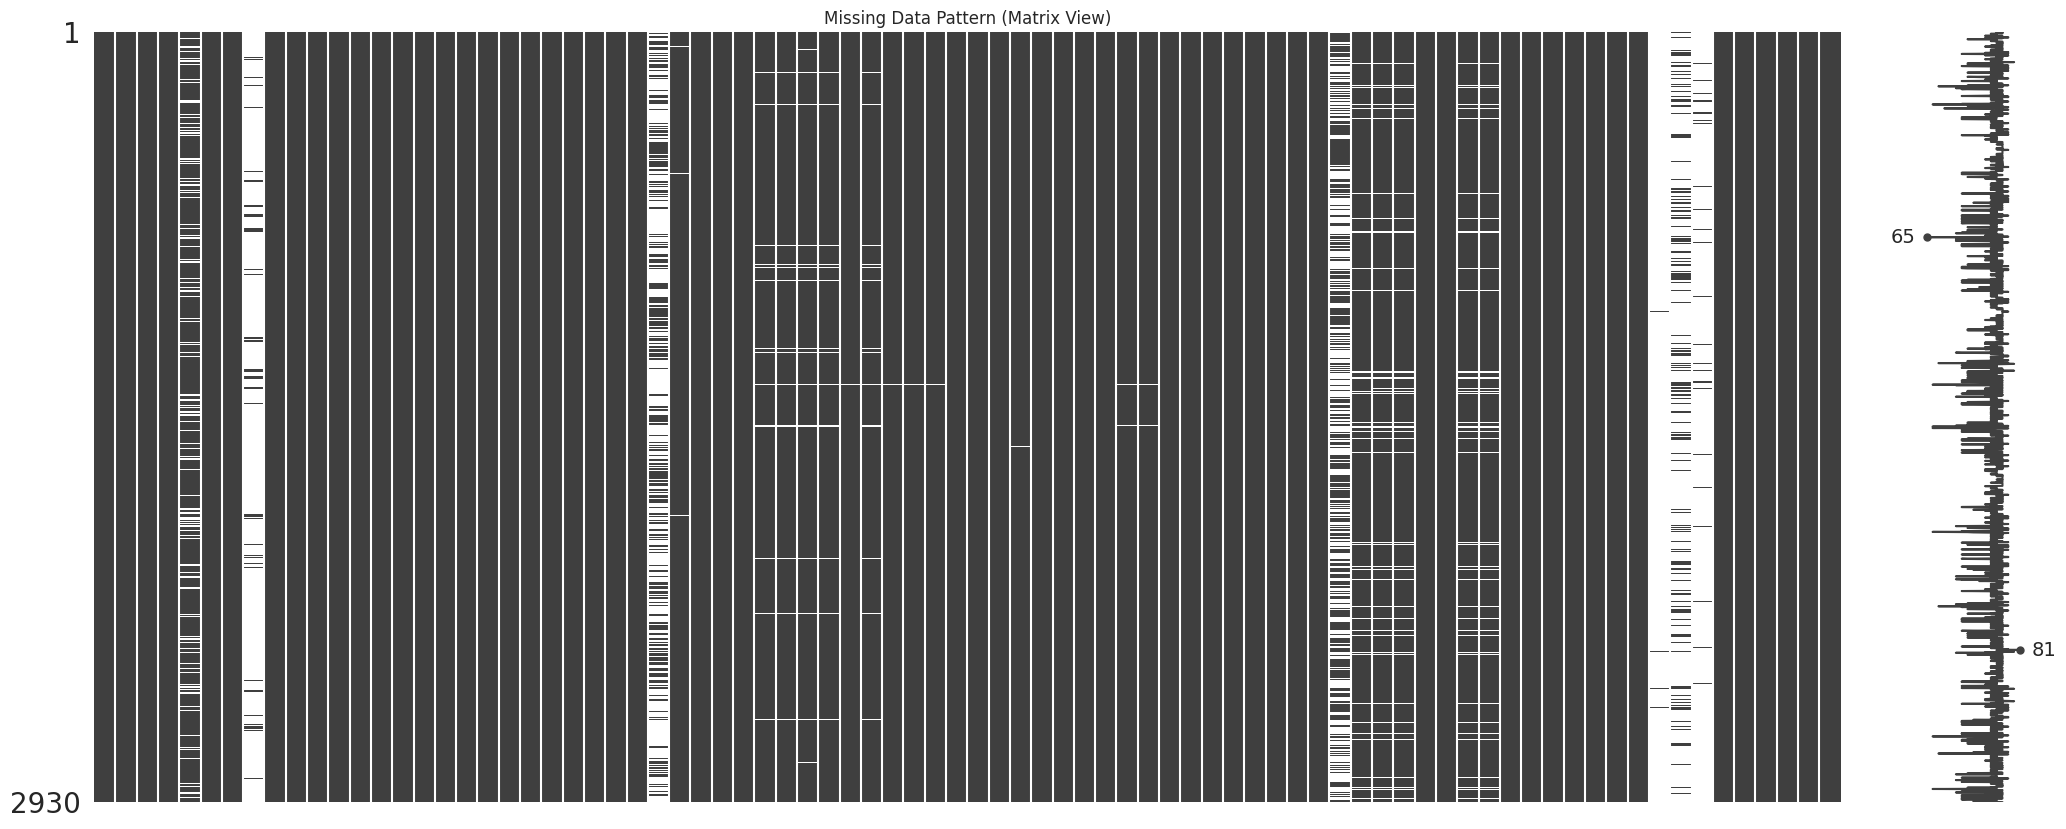

In [9]:
import missingno as msno

# Visualize missing data as a matrix
plt.figure(figsize=(12,6))
msno.matrix(df)
plt.title("Missing Data Pattern (Matrix View)")
plt.show()

#### Matrix View 

- Each column = a dataset feature.

- Each row = a house entry.

- White gaps = missing values.

- we can see long white vertical lines in some columns → that’s consistent missing data.

#### 🧠 Observation:

- Pool QC, Misc Feature, Alley, and Fence have large continuous white sections — meaning they are missing for most rows.

- Basement and garage columns have partial missingness — not random, likely due to houses without basements or garages.

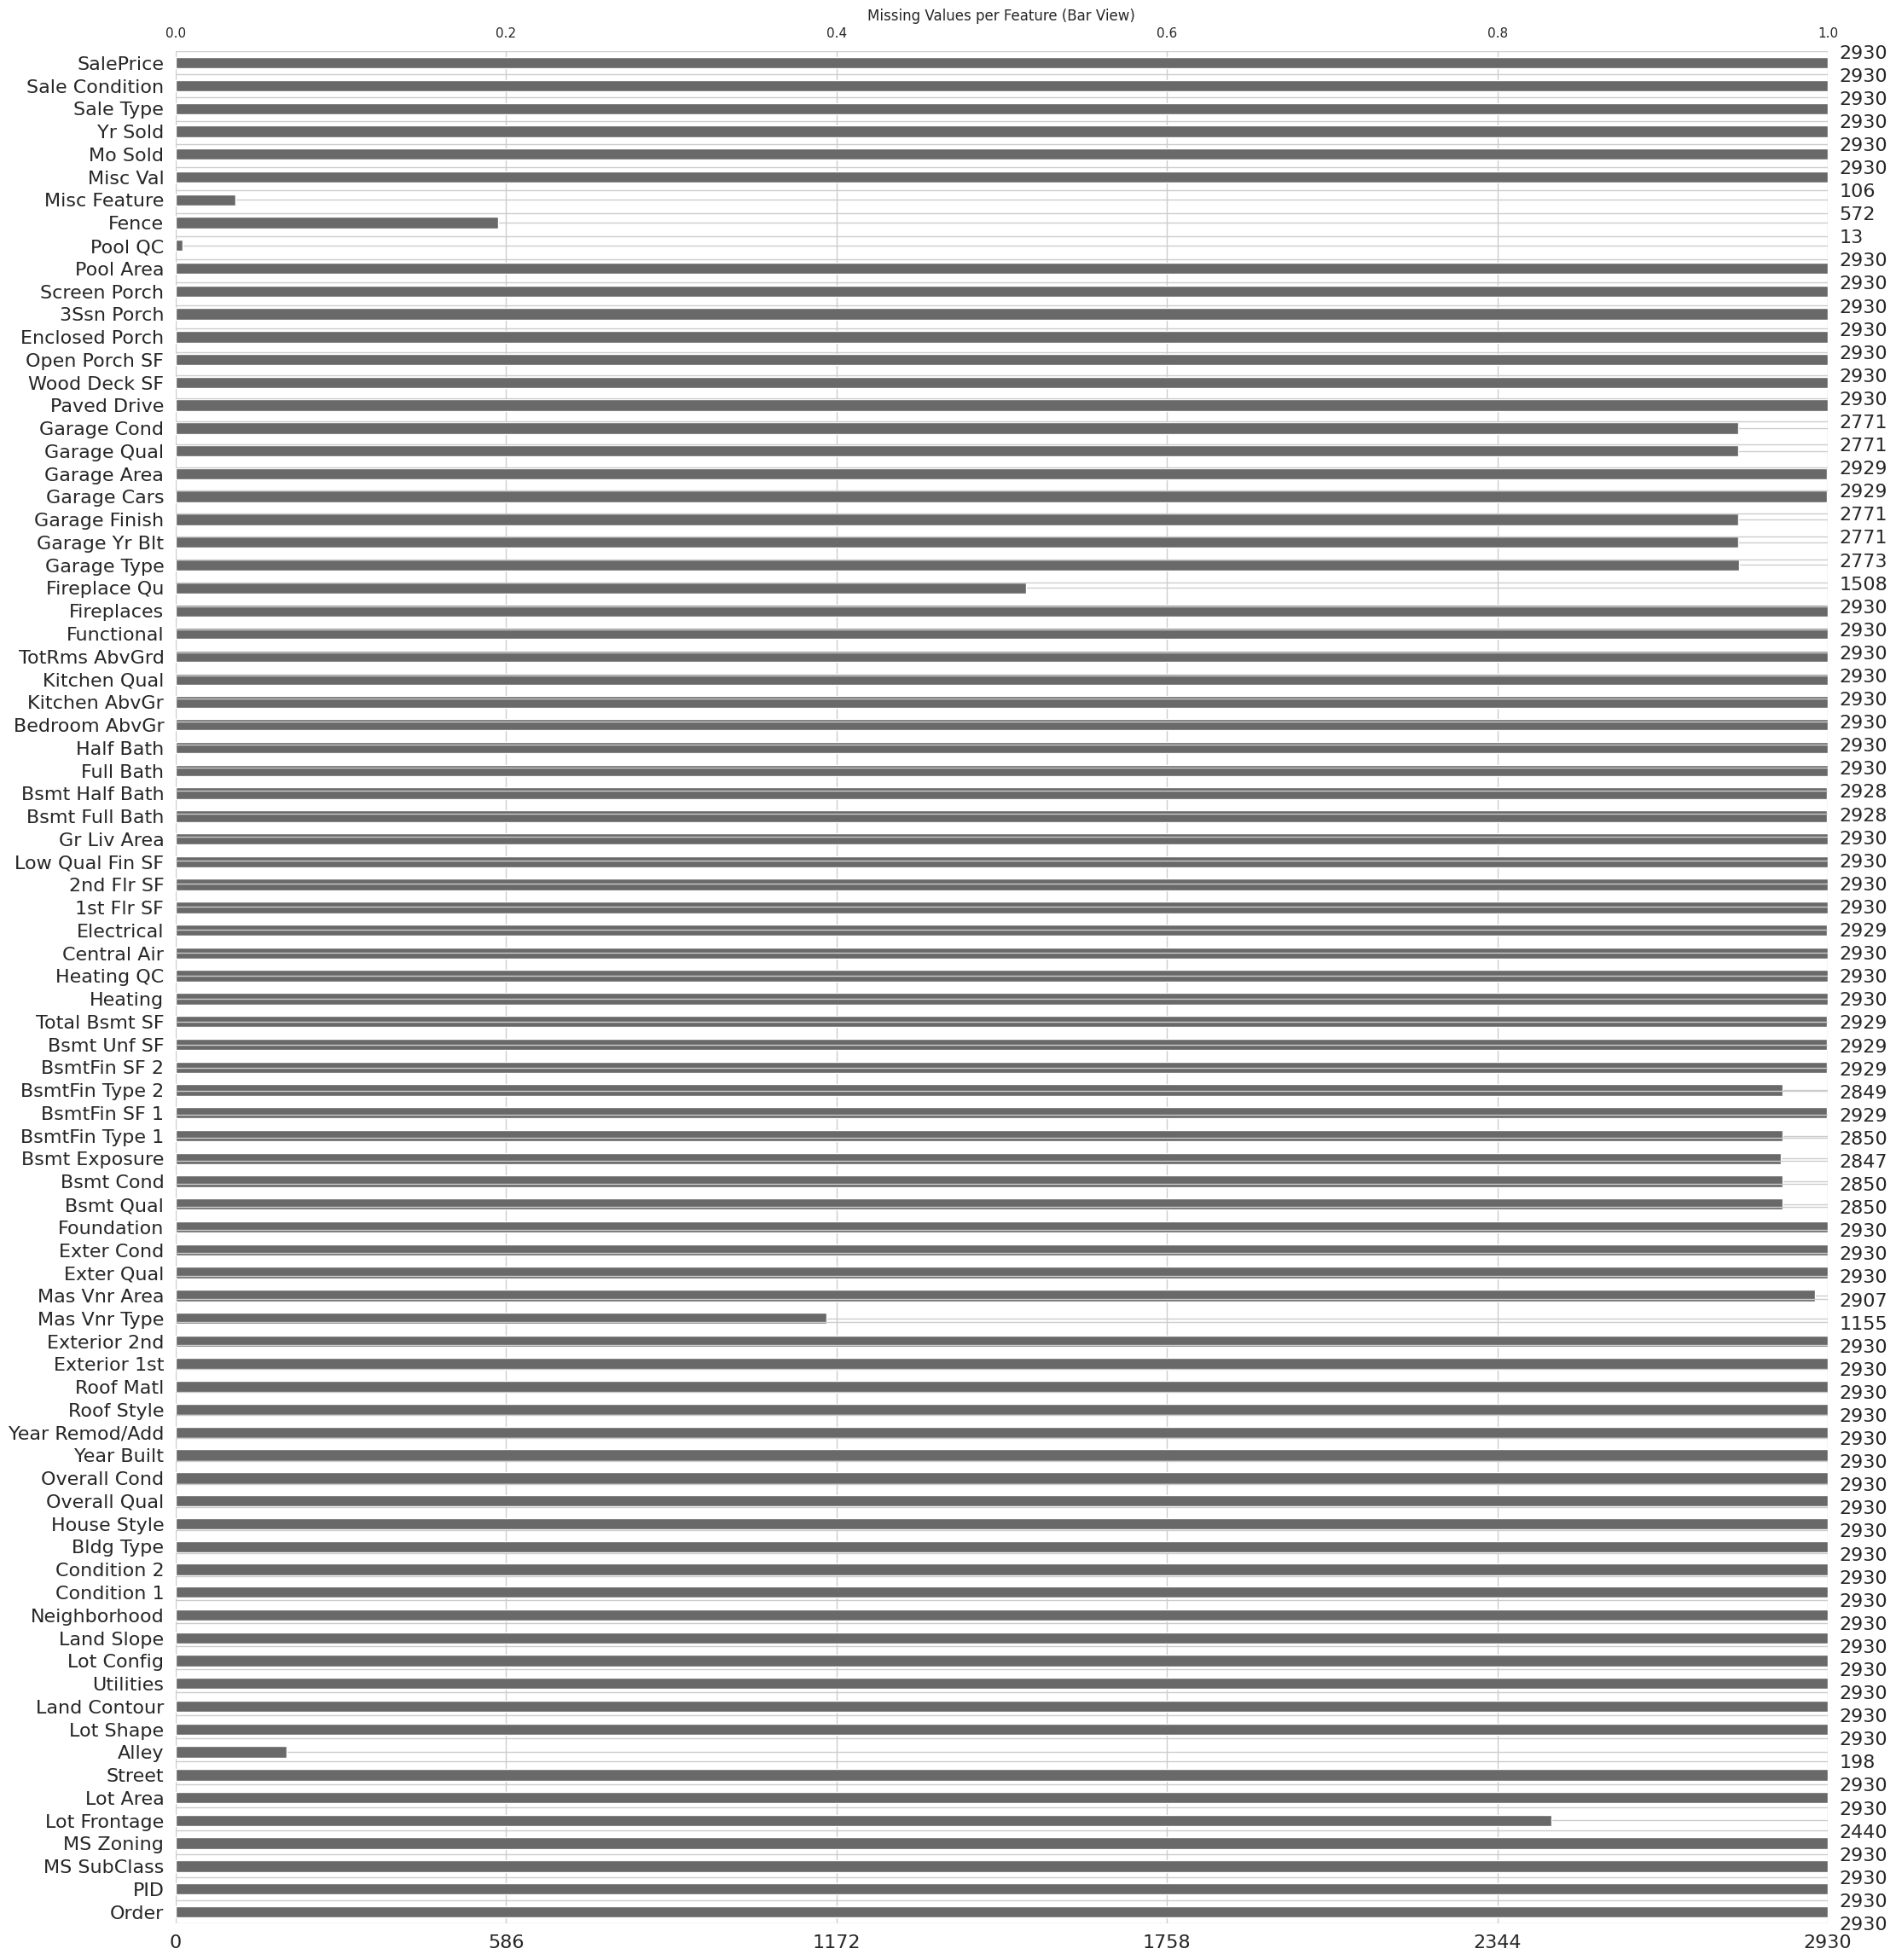

In [10]:
# Visualize missing data as a bar chart
plt.figure(figsize=(10,5))
msno.bar(df)
plt.title("Missing Values per Feature (Bar View)")
plt.show()

### Bar View

- The longer the white bar, the higher the percentage of missing values.

- Confirms the same pattern numerically:

    - Pool QC, Misc Feature, Alley, Fence → >80% missing

    - Mas Vnr Type, Fireplace Qu → moderate missingness

    - Garage and Basement groups → small but meaningful gaps.

#### Handle Missing Values (Drop + Impute)
#### ===============================================
#### 🧹 Handling Missing Values
#### ===============================================

In [11]:
# 1️⃣ Drop columns with too many missing values (>80%)
cols_to_drop = ["Pool QC", "Misc Feature", "Alley", "Fence"]
df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns with excessive missing values: {cols_to_drop}")

Dropped columns with excessive missing values: ['Pool QC', 'Misc Feature', 'Alley', 'Fence']


In [12]:
# 2️⃣ Impute categorical columns based on meaning
# Replace missing values in certain categorical columns with 'None' or domain-specific category
categorical_impute_none = [
    "Mas Vnr Type", "Fireplace Qu", "Garage Type", "Garage Finish",
    "Garage Qual", "Garage Cond", "Bsmt Qual", "Bsmt Cond",
    "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2"
]
df[categorical_impute_none] = df[categorical_impute_none].fillna("None")

In [13]:
# 3️⃣ Impute numerical columns (fill missing with 0 for areas / counts)
numeric_impute_zero = [
    "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF",
    "Total Bsmt SF", "Bsmt Full Bath", "Bsmt Half Bath",
    "Garage Yr Blt", "Garage Cars", "Garage Area"
]
df[numeric_impute_zero] = df[numeric_impute_zero].fillna(0)

In [14]:
# 4️⃣ Impute Lot Frontage with median per neighborhood (since it depends on location)
df["Lot Frontage"] = df.groupby("Neighborhood")["Lot Frontage"].transform(lambda x: x.fillna(x.median()))

In [15]:
# 5️⃣ Electrical has one missing value; fill with mode
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

In [16]:
# ✅ Verify no missing values remain
print("\nRemaining Missing Values:\n", df.isnull().sum().sum())


Remaining Missing Values:
 3


#### Univariate Analysis – Numerical Features
#### ===============================================
#### 📊 Univariate Analysis - Numerical Features
#### ===============================================

In [17]:
# Select only numeric columns for visualization
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [18]:
# Exclude identifier columns (Order, PID)
numeric_cols = [col for col in numeric_cols if col not in ["Order", "PID"]]

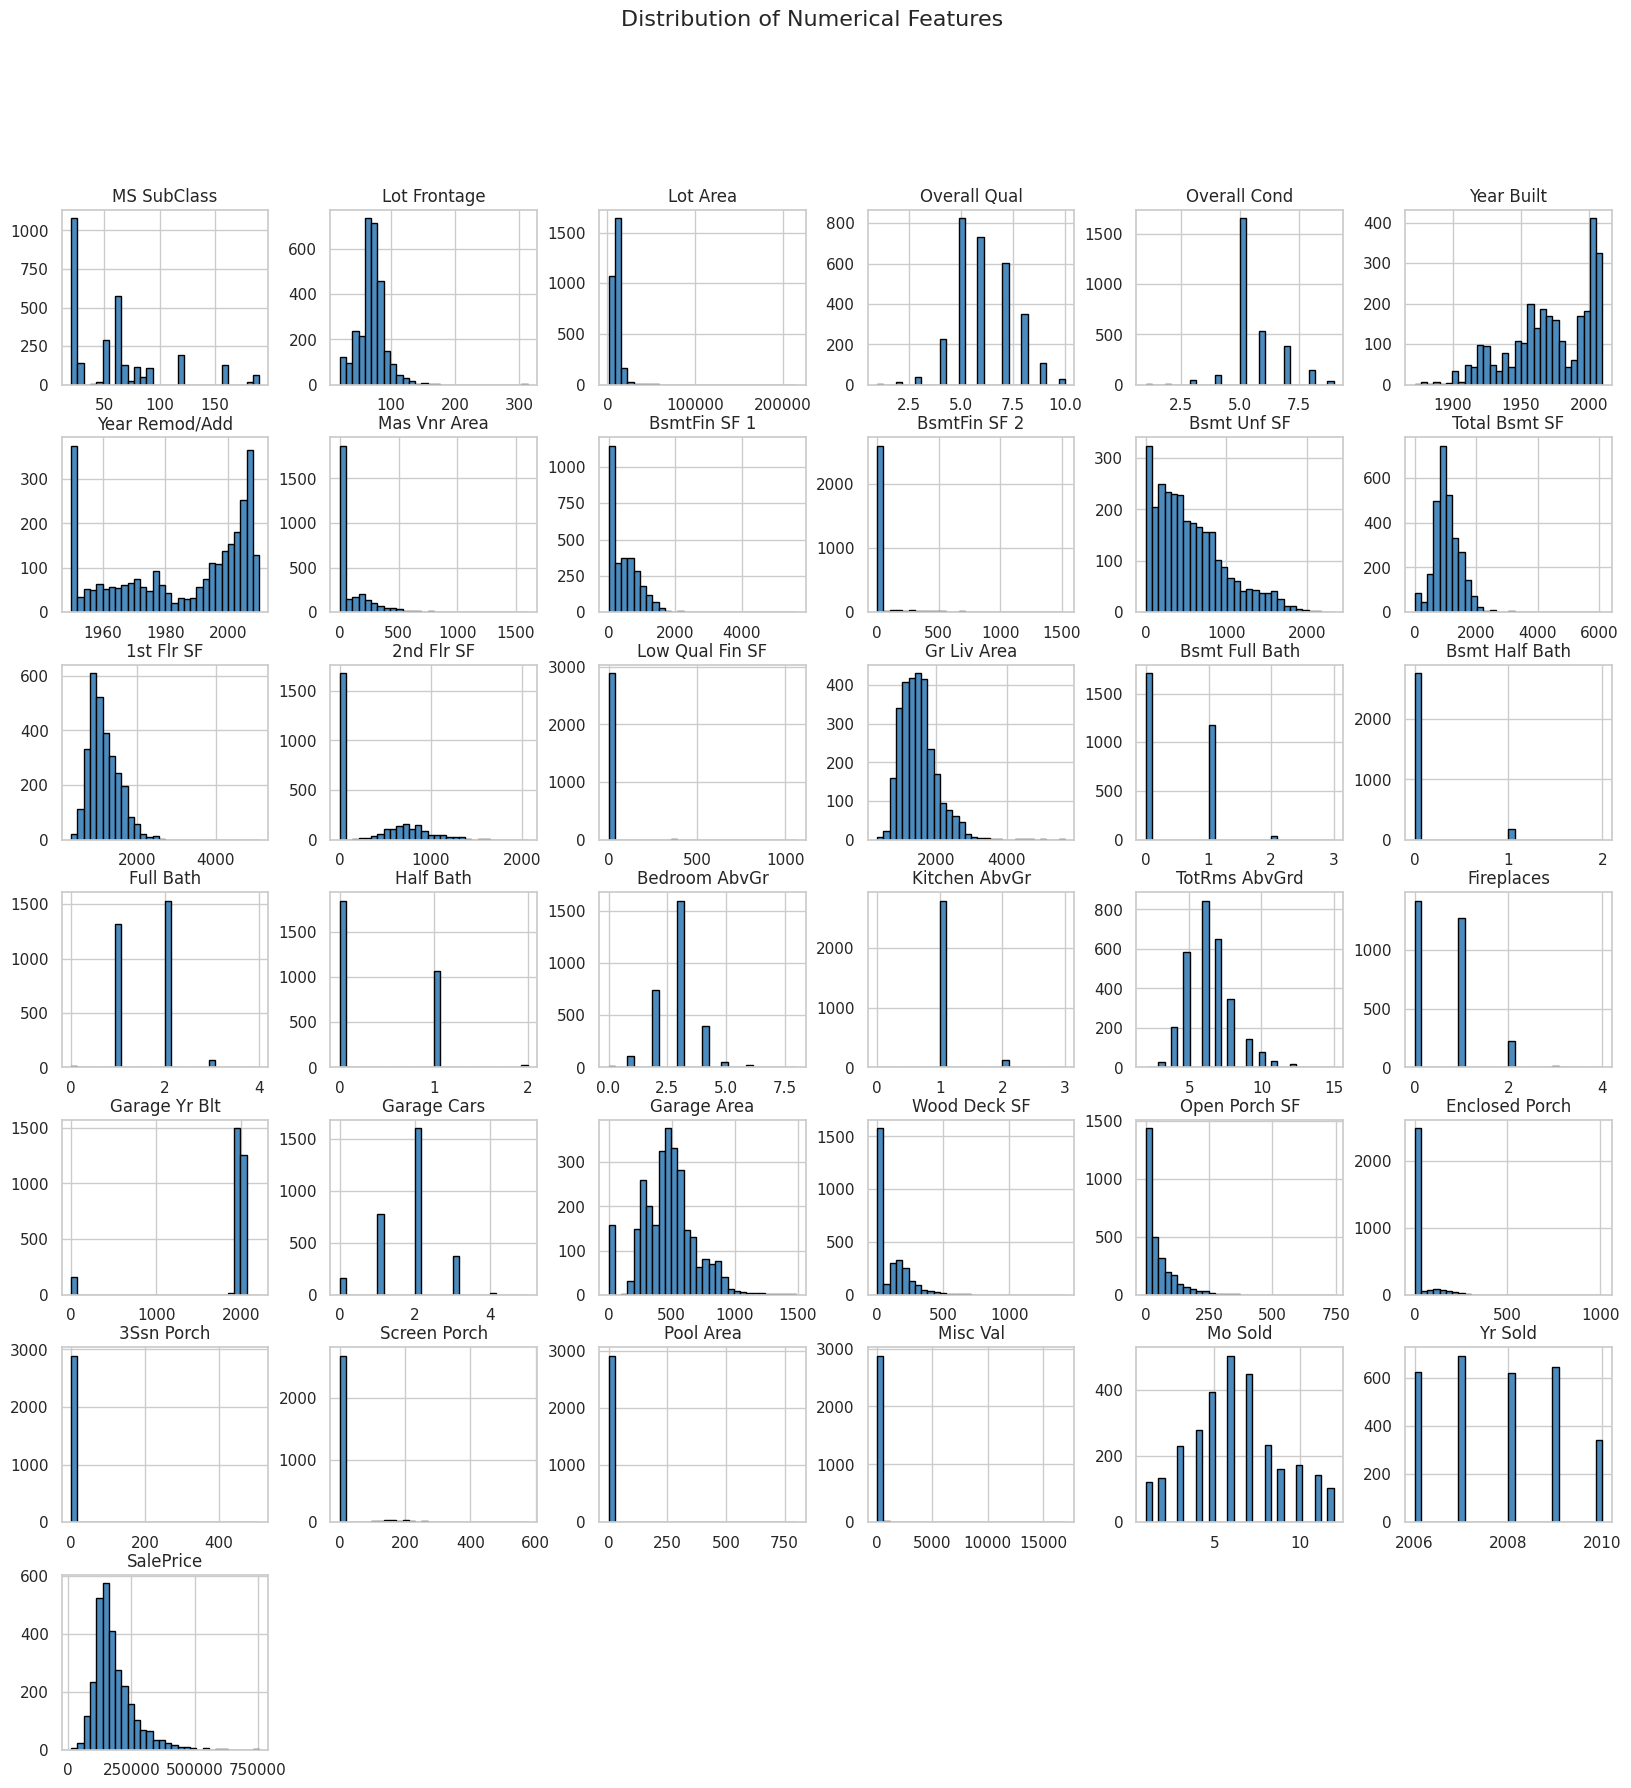

In [19]:
# Plot histograms for numerical features
df[numeric_cols].hist(figsize=(20, 20), bins=30, color="#4B8BBE", edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

| Feature                            | Distribution Shape   | Interpretation                                                                |
| ---------------------------------- | -------------------- | ----------------------------------------------------------------------------- |
| **Lot Area**                       | Right-skewed         | Most houses have small lots; a few large properties inflate range (outliers). |
| **SalePrice**                      | Right-skewed         | Common in housing prices — a few luxury homes pull the mean upward.           |
| **Gr Liv Area**, **Total Bsmt SF** | Right-skewed         | Larger homes are fewer in number.                                             |
| **Overall Qual**                   | Slightly left-skewed | More high-quality homes (6–8 range) than poor-quality ones.                   |
| **Year Built**, **Year Remod/Add** | Multi-peaked         | Reflects waves of development (old houses + modern builds).                   |
| **Garage Cars**, **Full Bath**     | Discrete peaks       | Most homes have 1–2 garages, 1–2 full baths.                                  |
| **Mo Sold**                        | Uniform-like         | Sales occur year-round; a few seasonal peaks (e.g., summer).                  |


#### Univariate Analysis (Categorical Features)
#### ===============================================
#### 📊 Univariate Analysis - Categorical Features
#### ===============================================


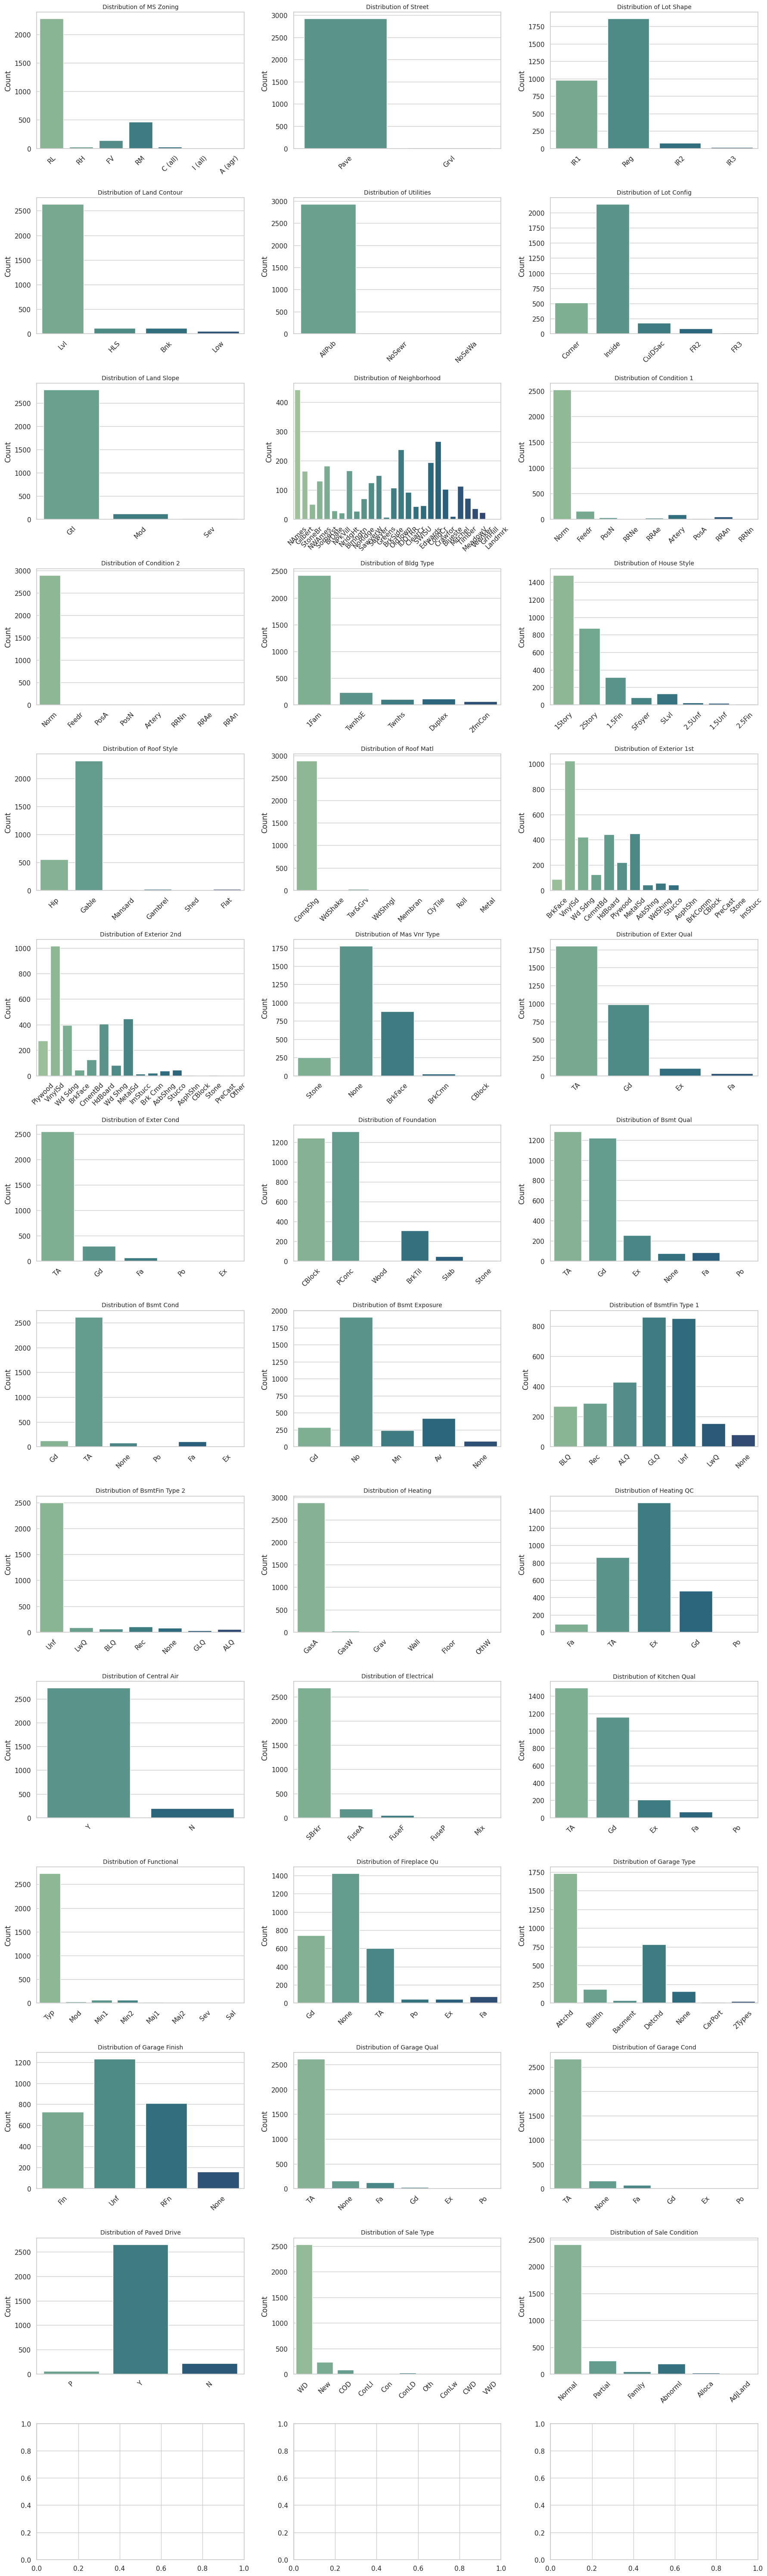

In [20]:
# Select only categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
# Plot countplots for each categorical column
fig, axes = plt.subplots(nrows=len(categorical_cols)//3 + 1, ncols=3, figsize=(18, 60))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="crest")
    axes[i].set_title(f"Distribution of {col}", fontsize=10)
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

in the dataset using count plots to understand their frequency distributions and balance across categories. This helps identify dominant categories, rare classes, and low-variance features that provide little or no predictive value.

* Several features show **diverse and meaningful variation**, indicating they are likely to contribute to predicting `SalePrice`.
  Examples:

  * `MS Zoning` → Multiple zoning categories (RL, RM, FV, etc.)
  * `Neighborhood` → Distinct distribution across 20+ neighborhoods
  * `Bldg Type`, `House Style`, `Exterior 1st/2nd`, `Garage Type`, `Kitchen Qual`, `Functional`, etc.

* A few features are **highly imbalanced**, dominated by one category, and thus carry very little information for modeling:

  | Feature     | Dominant Category | Interpretation                       |
  | ----------- | ----------------- | ------------------------------------ |
  | Street      | Pave (~100%)      | Almost all houses are on paved roads |
  | Utilities   | AllPub (~99%)     | No variation                         |
  | Land Slope  | Gtl (~98%)        | Minimal variation                    |
  | Condition 2 | Norm (~99%)       | Very low variance                    |
  | Roof Matl   | CompShg (~98%)    | Homogeneous feature                  |
  | Heating     | GasA (~99%)       | Single-category dominance            |

  These will be **dropped** in the next step to reduce noise and simplify modeling.

* Some features contain **rare categories** (e.g., in `Mas Vnr Type`, `Exterior 2nd`, `Sale Type`).
  These can be grouped under a generic class like “Other” during feature engineering.


* Categorical EDA confirms that the dataset contains a mix of **informative** and **uninformative** features.

#### Drop Uninformative Categorical Features
#### ===============================================
#### 🧹 Drop Low-Variance Categorical Features
#### ===============================================

In [21]:
# Features dominated by one category (low information)
low_variance_cols = ["Street", "Utilities", "Condition 2", "Roof Matl", "Heating", "Land Slope"]

# Drop them
df.drop(columns=low_variance_cols, inplace=True)
print(f"Dropped low-variance columns: {low_variance_cols}")

# Verify column count after dropping
print("Remaining columns:", len(df.columns))

Dropped low-variance columns: ['Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating', 'Land Slope']
Remaining columns: 72


| Step                     | Action                                                                         | Result                                                         |
| ------------------------ | ------------------------------------------------------------------------------ | -------------------------------------------------------------- |
| 🧹 **Dropped Columns**   | `['Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating', 'Land Slope']` | These features had ~99% of one category (no predictive power). |
| 📉 **Remaining Columns** | 72                                                                             | A clean, balanced dataset — ready for deeper analysis.         |


#### Bivariate Analysis (Correlation & Price Relationships)
#### ===============================================
#### 🔗 Bivariate Analysis - Correlation Heatmap
#### ===============================================

🔹 Top 10 Features Most Correlated with SalePrice:

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647562
Garage Area       0.640138
Total Bsmt SF     0.632529
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Mas Vnr Area      0.502196
Name: SalePrice, dtype: float64


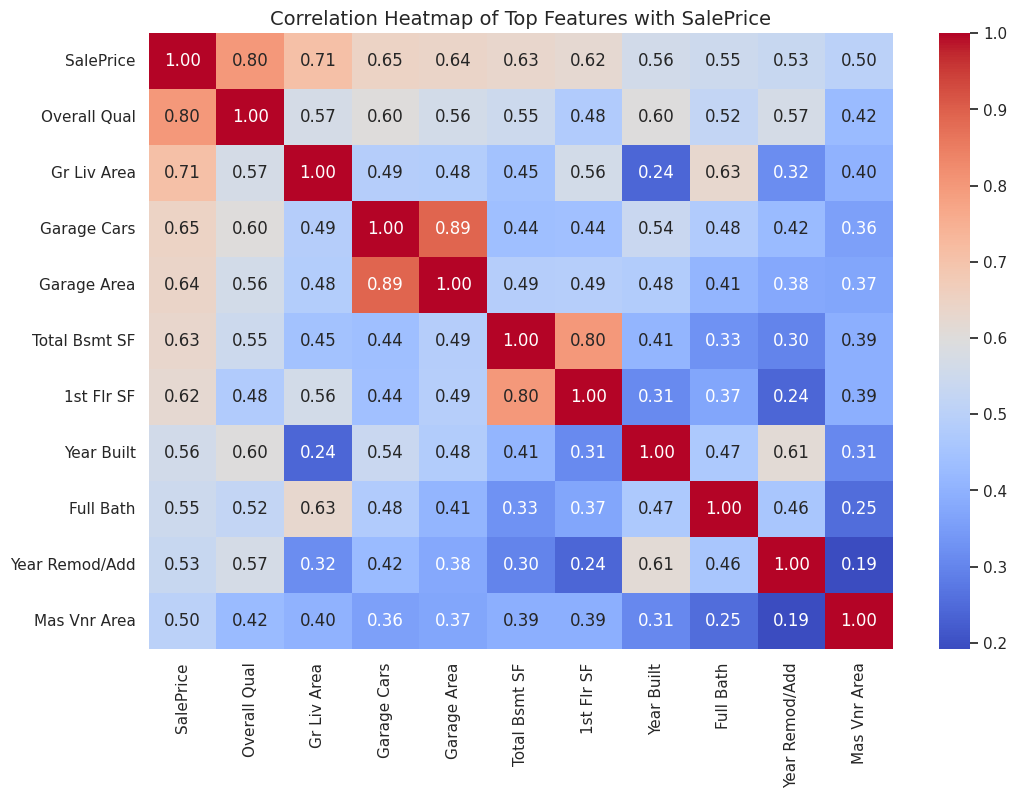

In [22]:
# Compute correlation matrix for numeric features
corr_matrix = df.corr(numeric_only=True)

# Display top 10 most correlated features with SalePrice
print("🔹 Top 10 Features Most Correlated with SalePrice:\n")
print(corr_matrix["SalePrice"].sort_values(ascending=False).head(11))

# Plot heatmap of correlations among top correlated features
plt.figure(figsize=(12, 8))
top_corr_features = corr_matrix["SalePrice"].sort_values(ascending=False).head(11).index
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Top Features with SalePrice", fontsize=14)
plt.show()


we examined the pairwise correlations between numerical variables and the target variable, SalePrice.
The goal is to identify which features have the strongest linear relationships with housing prices.

🧮 Top 10 Features Most Correlated with SalePrice

| Rank | Feature            | Correlation | Interpretation                                                                         |
| :--: | :----------------- | :---------- | :------------------------------------------------------------------------------------- |
|   1  | **Overall Qual**   | 0.80        | Strongest predictor — higher overall material/finish quality strongly increases price. |
|   2  | **Gr Liv Area**    | 0.71        | Larger above-ground living areas lead to higher sale prices.                           |
|   3  | **Garage Cars**    | 0.65        | Number of cars the garage can hold shows strong influence.                             |
|   4  | **Garage Area**    | 0.64        | Correlated with `Garage Cars`, both indicate garage capacity.                          |
|   5  | **Total Bsmt SF**  | 0.63        | Larger basements contribute positively to house value.                                 |
|   6  | **1st Flr SF**     | 0.62        | Bigger ground floors correlate with higher prices.                                     |
|   7  | **Year Built**     | 0.56        | Newer homes tend to be more valuable.                                                  |
|   8  | **Full Bath**      | 0.55        | More bathrooms add to property worth.                                                  |
|   9  | **Year Remod/Add** | 0.53        | Renovated homes fetch higher prices.                                                   |
|  10  | **Mas Vnr Area**   | 0.50        | Masonry veneer area has moderate impact on price.                                      |


Heatmap Interpretation

- The heatmap visualizes the correlation coefficients between the top 10 numeric features and SalePrice.

- Deep red = strong positive correlation → variables that move together (e.g., Overall Qual and SalePrice).

- Blue = weaker or negative correlation.

- Notice that some features (e.g., Garage Cars and Garage Area) are highly correlated with each other (r ≈ 0.89), indicating multicollinearity, which we’ll handle during the modeling phase.

✅ Insights

- The target variable SalePrice is most influenced by quality, size, and condition-related features.

- These high-correlation variables will be key predictors in model training later.

- Moderate correlations from features like Year Built and Year Remod/Add suggest temporal influence (newer = more expensive).


#### Bivariate Visualizations (Numeric vs. SalePrice)
#### ===============================================
#### 📈 Bivariate Visualizations - Continuous Features vs. SalePrice
#### ===============================================

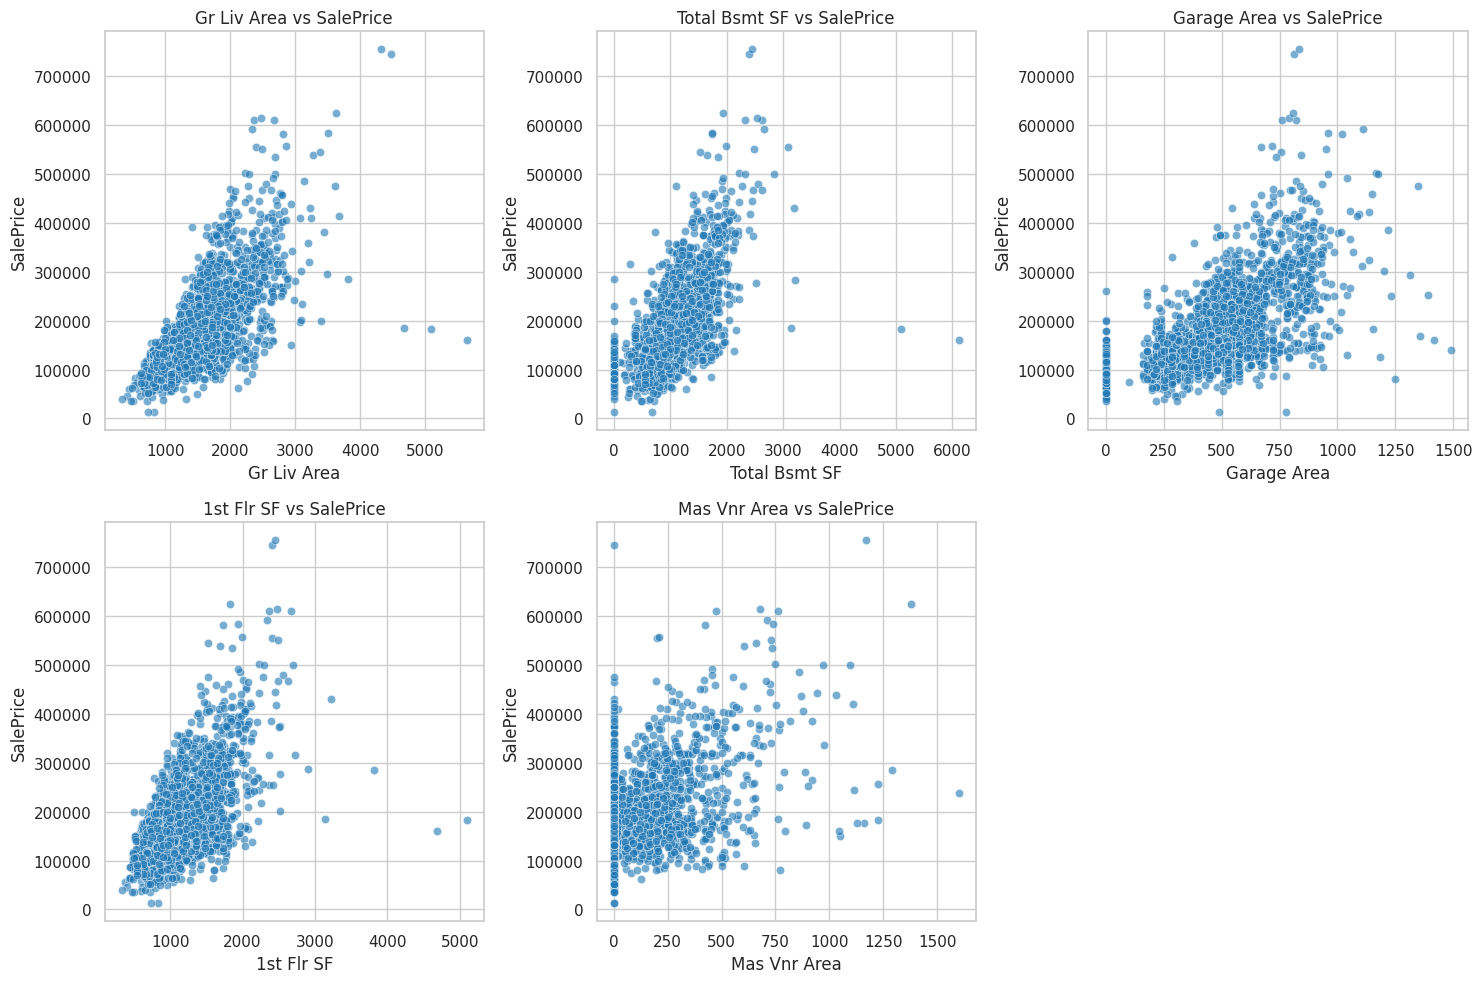

In [23]:
# List of top continuous features to visualize
top_features = ["Gr Liv Area", "Total Bsmt SF", "Garage Area", "1st Flr SF", "Mas Vnr Area"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=df, x=feature, y="SalePrice", alpha=0.6, color="#1f77b4")
    plt.title(f"{feature} vs SalePrice")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")

plt.tight_layout()
plt.show()


### 📊 **1. Gr Liv Area vs SalePrice**

* Clear **positive linear relationship** — as living area increases, so does the sale price.
* A few extreme outliers (very large homes with moderate prices) are visible — we’ll address these in the outlier handling step.

### 🧱 **2. Total Bsmt SF vs SalePrice**

* Strong upward trend: homes with larger basements tend to have higher prices.
* Some zero-basement homes visible at the bottom, forming a cluster near `0`.

### 🚗 **3. Garage Area vs SalePrice**

* Positive linear pattern — larger garages often indicate higher-quality or newer homes.
* Slight variance for mid-sized garages, but trend remains consistent.

### 🏠 **4. 1st Flr SF vs SalePrice**

* Again, a steady increase in price with larger ground floor area.
* Some spread at higher square footage levels — likely due to other factors (like location or overall quality).

### 🧱 **5. Mas Vnr Area vs SalePrice**

* Weak but positive correlation — properties with larger masonry veneer areas tend to be more expensive.
* High variance — outliers likely due to rare design styles or luxury constructions.

---

### ⚠️ **Key Insight**

All five features show **positive monotonic relationships** with `SalePrice`.
The trends are not perfect straight lines but clearly upward — typical for housing data.
We’ll later log-transform skewed features like `Gr Liv Area`, `Lot Area`, and `SalePrice` to improve linearity for modeling.

---

### 📈 **Bivariate Analysis – Continuous Features vs. SalePrice**

We plotted `SalePrice` against the most correlated continuous variables to visually inspect their relationships.

#### 🧠 **Observations**

* All selected features show **positive linear trends** with `SalePrice`.
* The **larger the size or area**, the **higher the property’s sale value**.
* Key drivers include:

  * **Gr Liv Area** (above-ground living area)
  * **Total Bsmt SF** (basement size)
  * **Garage Area / 1st Flr SF** (space-based quality indicators)
* A few **outliers** exist (e.g., extremely large properties with moderate prices), which will be reviewed during the outlier analysis.

#### ✅ **Conclusion**

* The scatterplots confirm strong positive relationships between house size-related features and sale price.
* These features will play a **critical role in model building** and **feature engineering**.
* Next, we will explore **categorical/ordinal features** using **boxplots** to compare average `SalePrice` across quality and condition categories.


### Boxplots for Categorical/Ordinal Features
##### ===============================================
#### 📦 Bivariate Analysis - Categorical/Ordinal Features vs. SalePrice
##### ===============================================

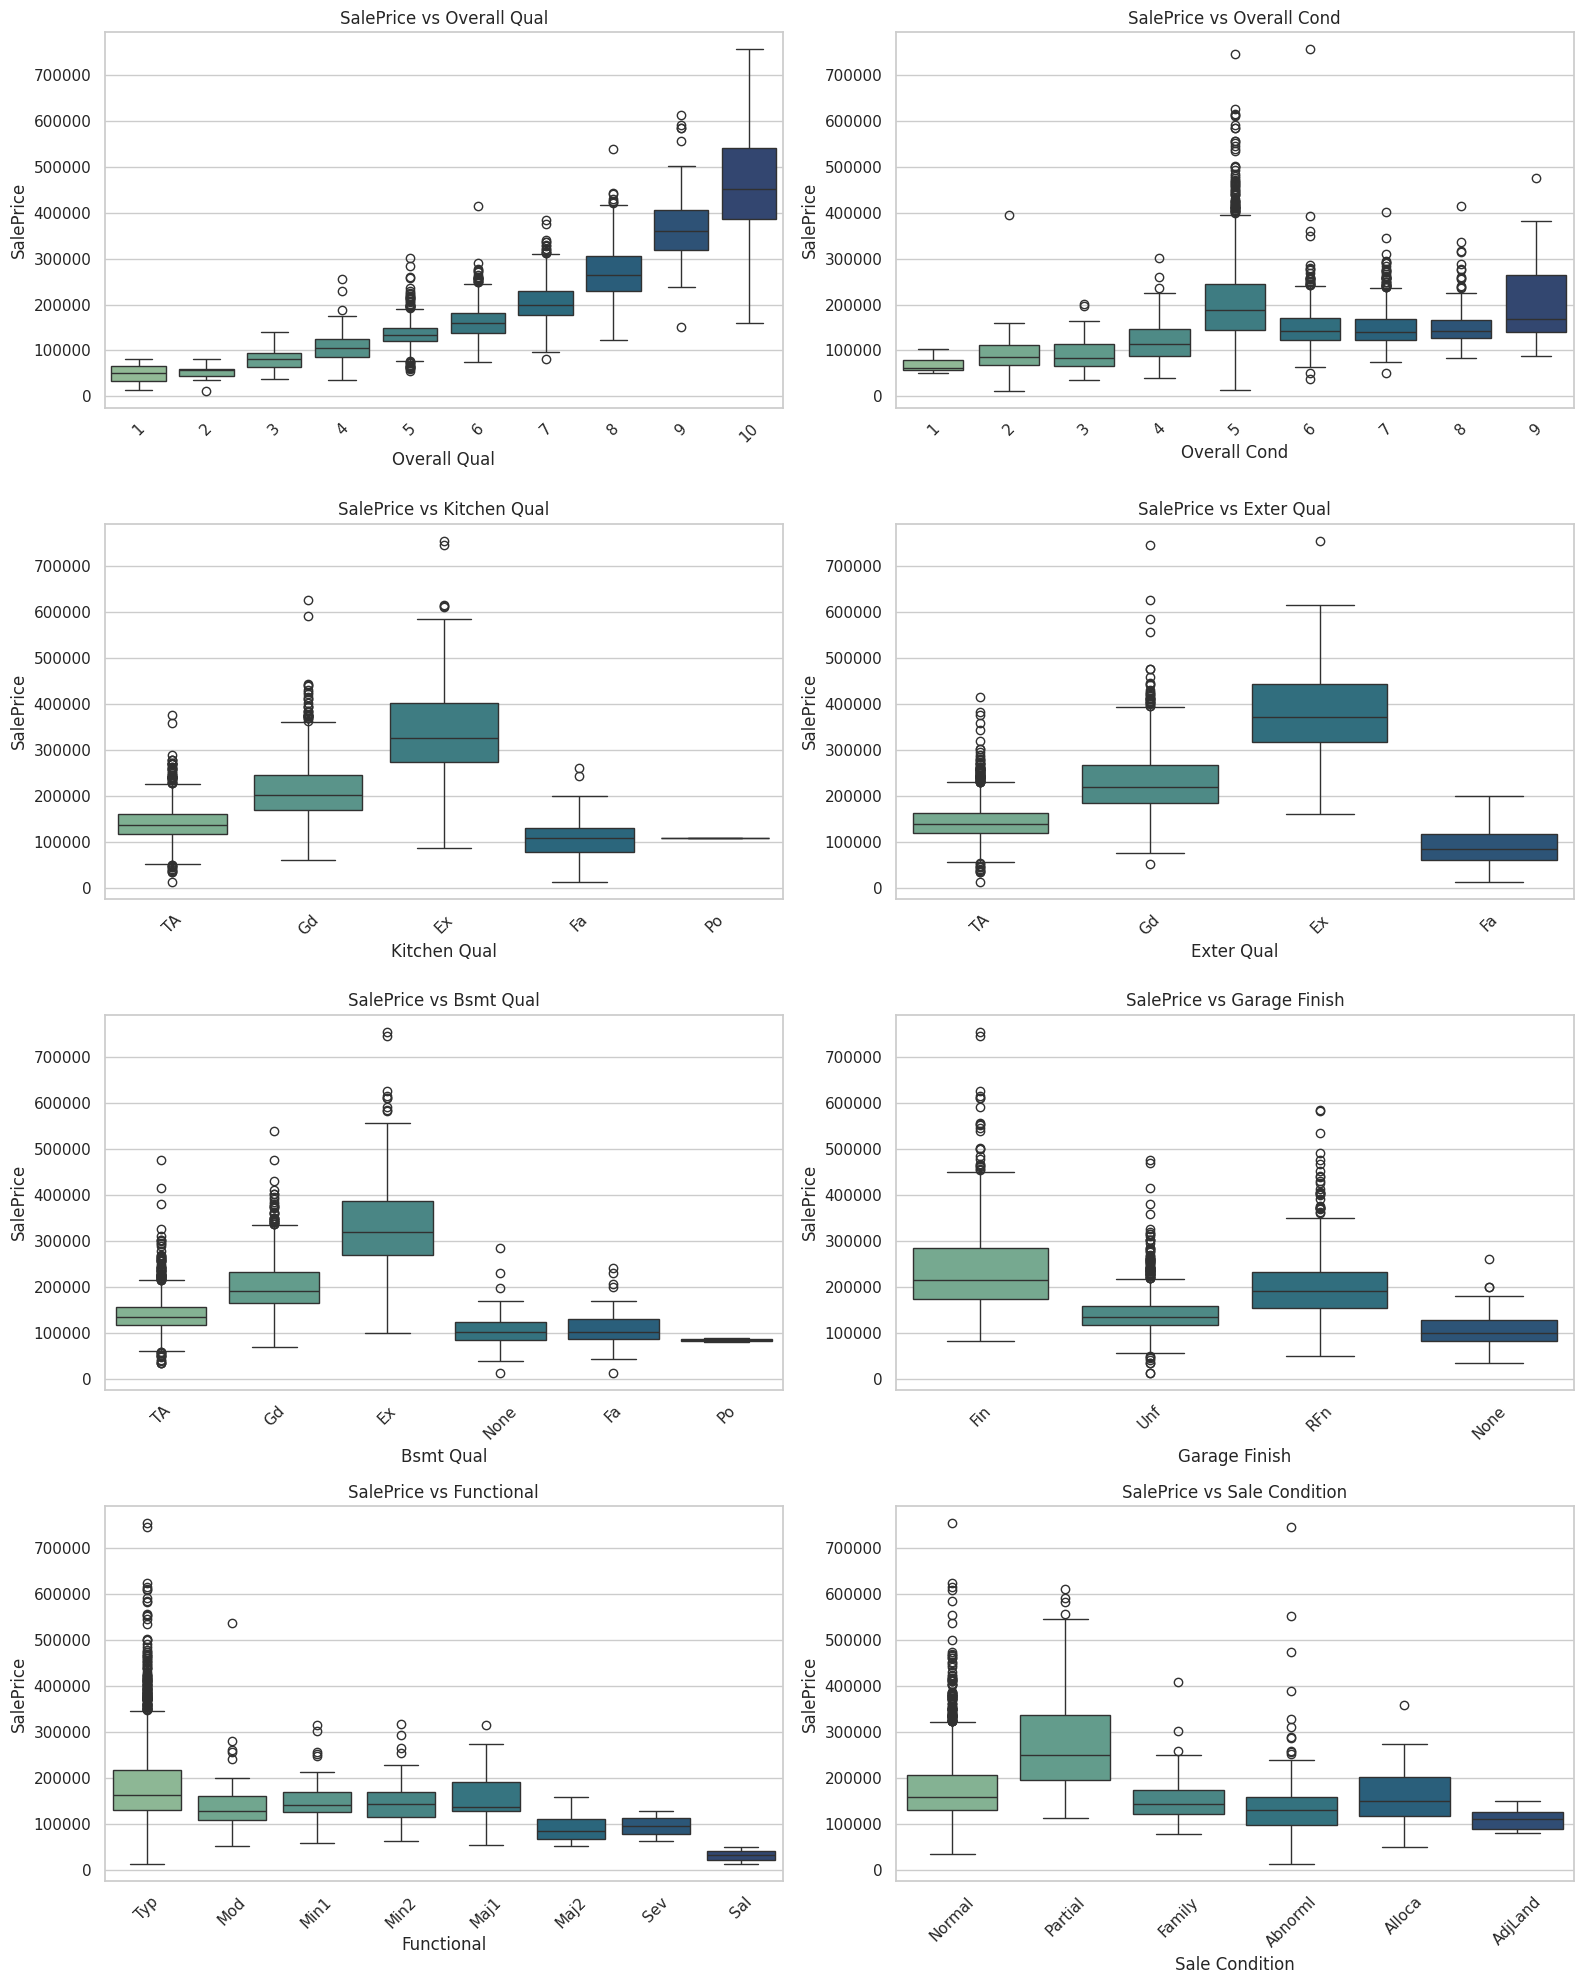

In [24]:
# Select important ordinal/categorical variables to visualize
categorical_features = [
    "Overall Qual", "Overall Cond", "Kitchen Qual",
    "Exter Qual", "Bsmt Qual", "Garage Finish", "Functional", "Sale Condition"
]

plt.figure(figsize=(16, 20))

for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df, x=feature, y="SalePrice", palette="crest")
    plt.title(f"SalePrice vs {feature}", fontsize=12)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

🧩 **Interpretation: Categorical / Ordinal Features vs. SalePrice**

our boxplots clearly demonstrate the **impact of qualitative ratings** (like quality, condition, and finish) on house prices.
Here’s the structured interpretation you can include 👇

---

### 📦 **Bivariate Analysis – Categorical / Ordinal Features vs. SalePrice**

This section explores how **qualitative features** such as material quality, condition, and functionality influence the house sale price (`SalePrice`).
Each boxplot shows the **median, quartile range, and outliers** for different categories of the feature.

#### 🧠 **Key Observations**

| Feature            | Relationship with SalePrice | Insights                                                                                                                                |
| ------------------ | --------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **Overall Qual**   | 🔺 Strong Positive          | Houses with higher overall quality ratings (8–10) command significantly higher prices. This is the most powerful categorical predictor. |
| **Overall Cond**   | ⚖️ Moderate                 | Good condition (ratings 5–8) shows higher price medians, but the trend is less linear than quality.                                     |
| **Kitchen Qual**   | 🔺 Strong                   | Kitchen quality (`Ex` > `Gd` > `TA` > `Fa`) shows a clear price gradient. High-end kitchens add substantial value.                      |
| **Exter Qual**     | 🔺 Positive                 | Better exterior materials and finishes increase property value.                                                                         |
| **Bsmt Qual**      | ⚖️ Moderate                 | Higher basement quality correlates with higher prices, but missing/“None” basements drop price.                                         |
| **Garage Finish**  | ⚖️ Moderate                 | Finished garages (`Fin`) have higher sale prices compared to unfinished ones.                                                           |
| **Functional**     | 🔻 Negative Trend           | Non-functional or partially functional homes (`Maj2`, `Sev`, `Sal`) have lower median prices.                                           |
| **Sale Condition** | ⚖️ Moderate                 | Normal sale conditions show the highest prices; abnormal sales (`Abnorml`, `AdjLand`) tend to lower value.                              |

#### 💡 **Overall Insight**

* `Overall Qual`, `Kitchen Qual`, and `Exter Qual` show the **strongest monotonic relationships** with `SalePrice`.
* Quality-related categorical features are **excellent predictors** and should be retained during feature selection.
* Outliers are visible in each plot (points far from the box) — these will be addressed in the **Outlier Handling** step next.

#### ✅ **Conclusion**

The boxplots confirm that **both physical size (from scatterplots)** and **qualitative quality (from boxplots)** are key determinants of house prices.
The dataset shows logical, consistent trends that validate its integrity and relevance for regression modeling.

---


### Outlier Detection using IQR (Interquartile Range) Method
#### ===============================================
#### 🚨 Outlier Detection - IQR Method
#### ===============================================


SalePrice: 137 outliers detected
Gr Liv Area: 75 outliers detected
Lot Area: 127 outliers detected
Total Bsmt SF: 124 outliers detected
Garage Area: 42 outliers detected


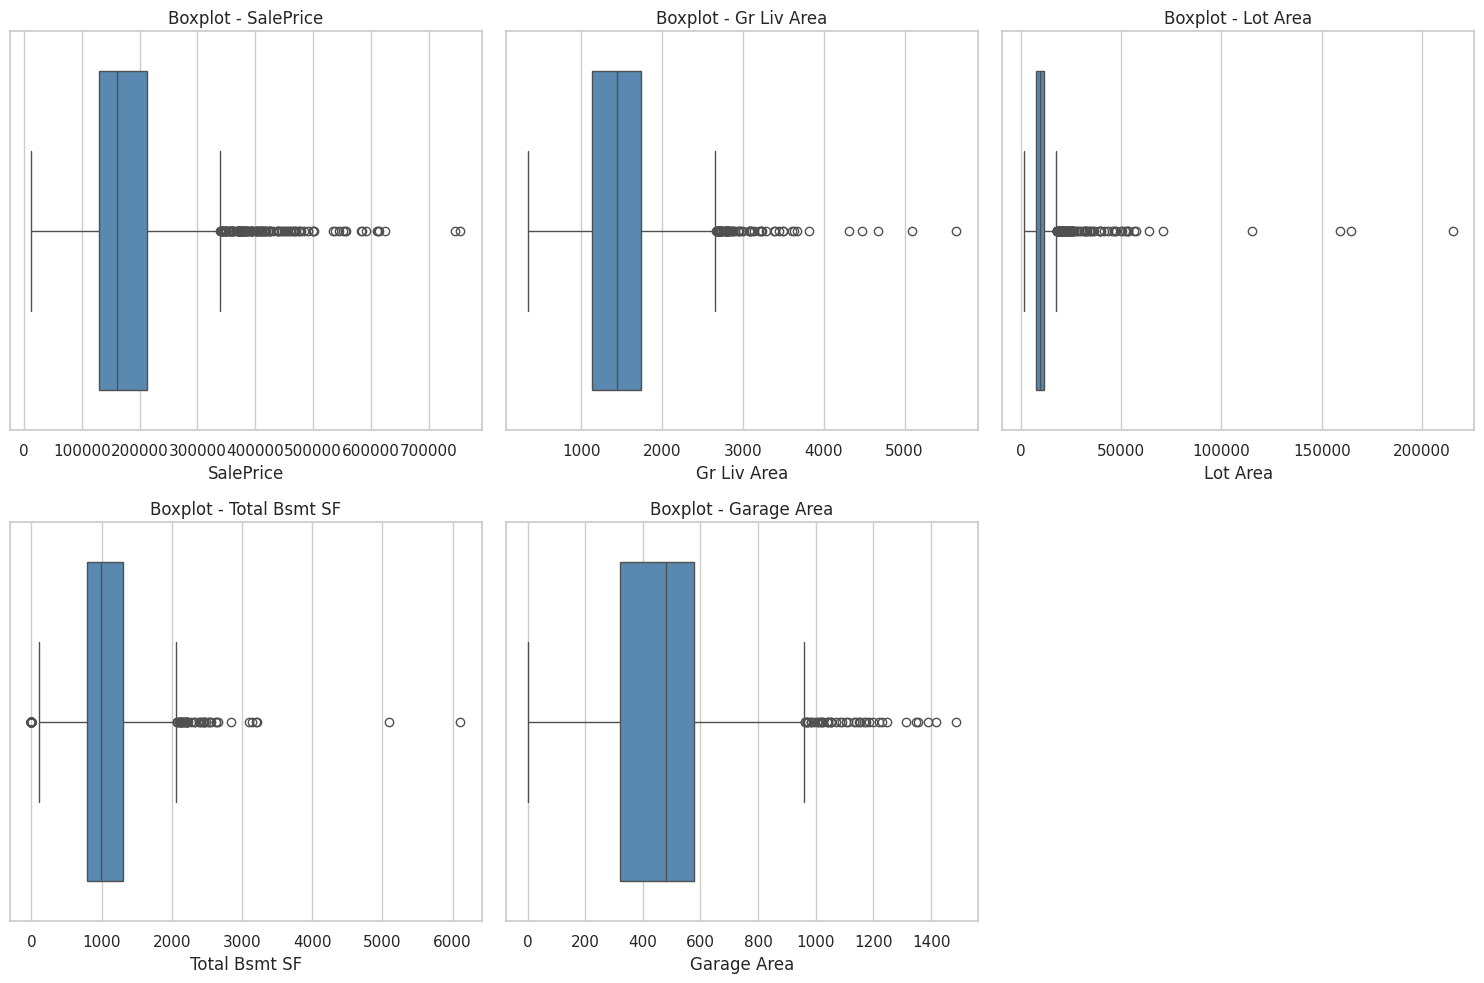

In [25]:
# Select key numeric columns for outlier analysis
key_numeric_features = ["SalePrice", "Gr Liv Area", "Lot Area", "Total Bsmt SF", "Garage Area"]

# Function to detect outliers using IQR method
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Identify and count outliers per feature
for feature in key_numeric_features:
    outliers = detect_outliers(df, feature)
    print(f"{feature}: {len(outliers)} outliers detected")

# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_numeric_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x=feature, color="#4B8BBE")
    plt.title(f"Boxplot - {feature}")
plt.tight_layout()
plt.show()



## 🧩 **Interpretation: Outlier Detection Results**

| Feature           | Outliers Detected | Interpretation                                                                           |
| ----------------- | ----------------- | ---------------------------------------------------------------------------------------- |
| **SalePrice**     | 137               | A few luxury or abnormally priced homes; likely genuine high-end properties, not errors. |
| **Gr Liv Area**   | 75                | Large luxury houses (above 4000 sq ft) cause long right tail → common in Ames dataset.   |
| **Lot Area**      | 127               | A few large properties with huge plots; these can heavily skew model results.            |
| **Total Bsmt SF** | 124               | Unusually large basements (> 3000 sq ft) — may need capping.                             |
| **Garage Area**   | 42                | Oversized garages or multiple garages; relatively mild outliers.                         |

🧠 **What this means:**

* These are **not data errors**, but **natural extremes** in the real-estate market.
* However, they can distort regression models, so we’ll **treat them carefully** — usually by *capping* extreme values using IQR limits instead of removing them outright.

---

## 📈 **Visual Review**

From your boxplots:

* The **majority** of values cluster tightly around the median.
* A small number of extreme points (circles) appear far from the box — confirming valid outliers visually.
* Right-skewed features (`Lot Area`, `SalePrice`, `Gr Liv Area`) will likely benefit from **log transformation** later during modeling.

---



---

### 🚨 **Outlier Detection Summary**

We identified outliers across key numerical features using the **Interquartile Range (IQR)** method.

#### 🧮 **Observations**

* Outliers exist primarily in **size-related** and **price** columns.
* These outliers represent **genuine large or luxury homes**, not data-entry errors.
* Removing them would cause loss of valid information; instead, they will be **capped or transformed** during the feature-engineering phase.

